<a href="https://colab.research.google.com/github/vaidande/Customer-Churn-Prediction-with-Keras-Tuner/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/vaidande/Churn-Rate-Prediction-with-Keras-Tuner/main/Churn_Modelling.csv'
dataset = pd.read_csv(url)
X = dataset.iloc[:, 3:13] #Excluding columns with no use
y = dataset.iloc[:, 13] #target value

In [3]:
dataset.isnull().sum() #Checking null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
geography = pd.get_dummies(X["Geography"], drop_first=True) #one hot encoding
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [6]:
X = pd.concat([X, geography, gender], axis=1)

In [7]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [12]:
model = Sequential()
model.add(Dense(10,kernel_initializer='he_uniform', activation='relu', input_dim=11))
model.add(Dense(10,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_history = model.fit(X_train, y_train, validation_split=0.33, epochs = 100, batch_size = 100)

Epoch 1/100
54/54 [==============================] - 1s 9ms/step - loss: 0.6608 - accuracy: 0.7440 - val_loss: 0.5707 - val_accuracy: 0.7846
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7980 - val_loss: 0.5219 - val_accuracy: 0.7910
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7890 - val_loss: 0.4942 - val_accuracy: 0.7936
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7857 - val_loss: 0.4775 - val_accuracy: 0.7952
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.7918 - val_loss: 0.4666 - val_accuracy: 0.7952
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.7950 - val_loss: 0.4594 - val_accuracy: 0.7955
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.7979 - val_loss: 0.4539 - val_accuracy: 0.7967
Epoch 8/100
5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


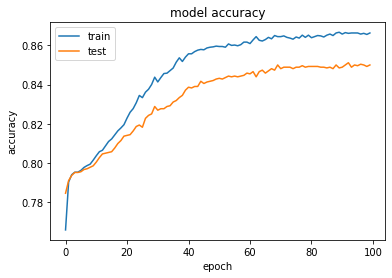

In [15]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

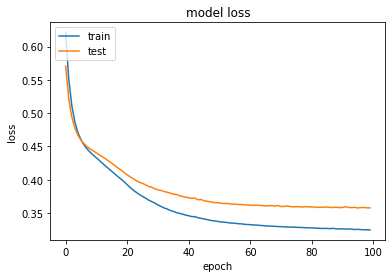

In [16]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [18]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[1526,   69],
       [ 208,  197]])

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [22]:
score

0.8615